# Perkenalan

Saya adalah seorang Data Scientist yang mendapatkan tugas untuk menganalisis sentimen dan prediksi sentimen produk Alexa. Di sini saya akan menggunakan pendekatan berbasis Deep Learning dengan arsitektur Long Short-Term Memory (LSTM), yang merupakan jenis Recurrent Neural Network (RNN). LSTM sangat cocok untuk tugas ini.  

- Saya mengambil sebuah dataset dari Kaggle.com  
- Saya menganilas data yang masih mentah  
- Saya melakukan pemrosesan data menggunakan berbagai library NLP dan membersihkan datanya 
- Saya lakukan analisa ulang sekali lagi setelah proses cleaning dan pre-preocesing
- Melatih dan Mengevaluasi Model. Metrik evaluasi yang saya gunakan antara lain: Akurasi, Precision, Recall, F1-Score, dan AUC-ROC.
- Saya melakukan proses deployment

# Import Libraries

In [41]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import download
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
import tensorflow_hub as tf_hub

# Download nltk resources
download('stopwords')
download('punkt')
download('wordnet')

# Set path for nltk data (opsional)
# nltk.data.path.append("/path/to/nltk_data")

# Set stopwords and lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define color codes for visualization
color_codes = [
    '#1d3d71ff',
    '#f26634ff',
    '#b19802ff',
    '#56a3a6ff',
    '#80a4edff',
    '#1be7ffff',
    '#df57bcff',
    '#496f5dff',
    '#88a0a8ff',
    '#00c49aff'
]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qaisahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/qaisahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/qaisahmad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Loading

Saya upload ulang file csv untuk kemudahan membaca file. 

In [16]:
pd.set_option('display.max_columns', 70)
df = pd.read_table('https://s.id/tsv_gc7')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


## Cek Informasi Dataset

Saya akan cek informasi dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


Terlihat dataset tidak terlalu besar. Hanya terdiri dari 3150 rows dan 3149 columns dengan tipe data Object dan Interger

## Cek Missing Value

Saya akan cek missing Value di awal

In [18]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

Terlihat, Missing Value ada di kolom inti, yaitu Reviews. Saya akan membuangnya

In [19]:
df[df['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [20]:
df = df.drop(df.index[473])
print(df[df['verified_reviews'].isnull()])
print(df.shape)

Empty DataFrame
Columns: [rating, date, variation, verified_reviews, feedback]
Index: []
(3149, 5)


Missing Value sudah tidak ada lagi. Selanjutnya saya akan cek Duplicate Value.

## Cek Duplicate Value

In [21]:
df[df.duplicated()]

,rating,date,variation,verified_reviews,feedback
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
701,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
702,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
703,5,30-Jul-18,Heather Gray Fabric,looks great,1
704,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


Terlihat dataset memiliki banyak duplicate value. Saya akan menghapusnya.

In [22]:
df = df.drop_duplicates()
print(df[df.duplicated()])
print(df.shape)

Empty DataFrame
Columns: [rating, date, variation, verified_reviews, feedback]
Index: []
(2434, 5)


In [23]:
print('Ukuran dataset sebelumnya: ',df.shape)
df['verified_reviews'] = df['verified_reviews'].str.strip()
df = df[df['verified_reviews'] != '']
df = df.reset_index(drop=True)
print('Ukuran dataset sekarang: ',df.shape)


Ukuran dataset sebelumnya:  (2434, 5)
Ukuran dataset sekarang:  (2384, 5)


# EDA Words & Character (Phase 1)

Seperti yang sudah saya nyatakan sebelumnya, bahwa saya akan melakukan analisa dua kali sebelum dan sesudah pre-processing. Saya akan mulai melakukan analisa EDA pertama

## Membuat variable khusus EDA

Pada tahapan awal analisa ini, saya akan membuat variabel baru bernama eda_df

In [24]:
eda_df= df.copy()
eda_df['feedback_string']= eda_df['feedback'].map({0: 'Negative', 1: 'Positive'})

Variabel eda_df sudah dibuat. Saya akan melakukan analisa Kolom Rating karena ini menarik untuk dicaritahu.

## Analisa Rating

Saya membuat beberapa plot yang mewakili setiap fitur

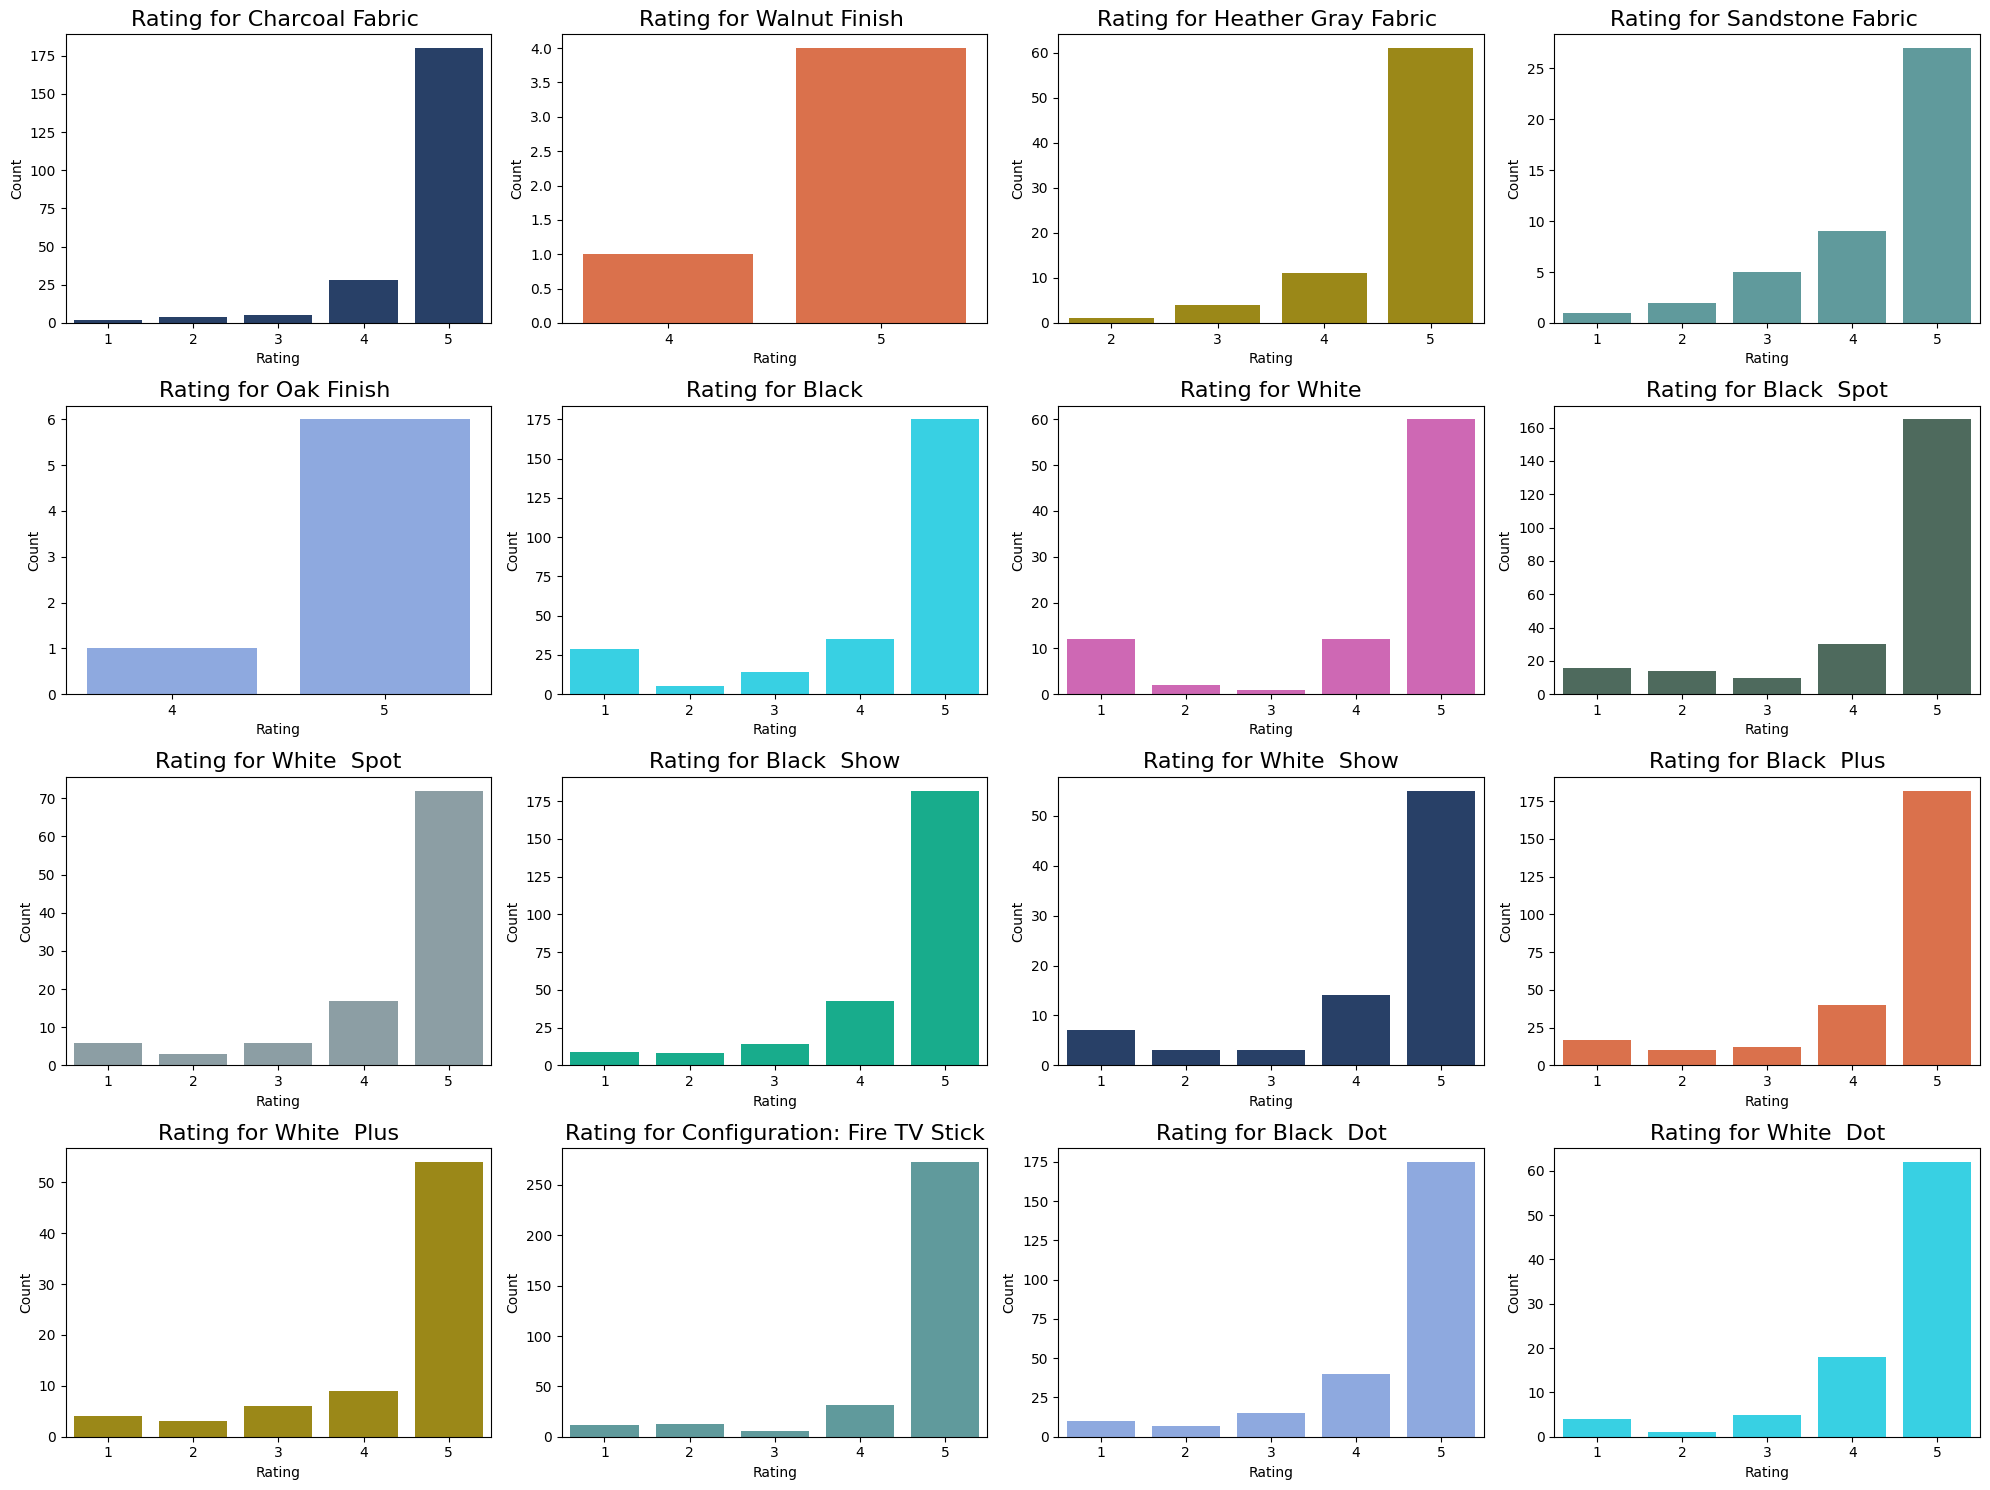

In [25]:
variations = df['variation'].unique()

fig, axes = plt.subplots(4, 4, figsize=(20, 15)) 

for i, variation in enumerate(variations):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    data_filtered = df[df['variation'] == variation]
    sns.countplot(x='rating', data=data_filtered, ax=ax, color=color_codes[i % len(color_codes)])
    ax.set_title(f'Rating for {variation}', fontsize=16)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


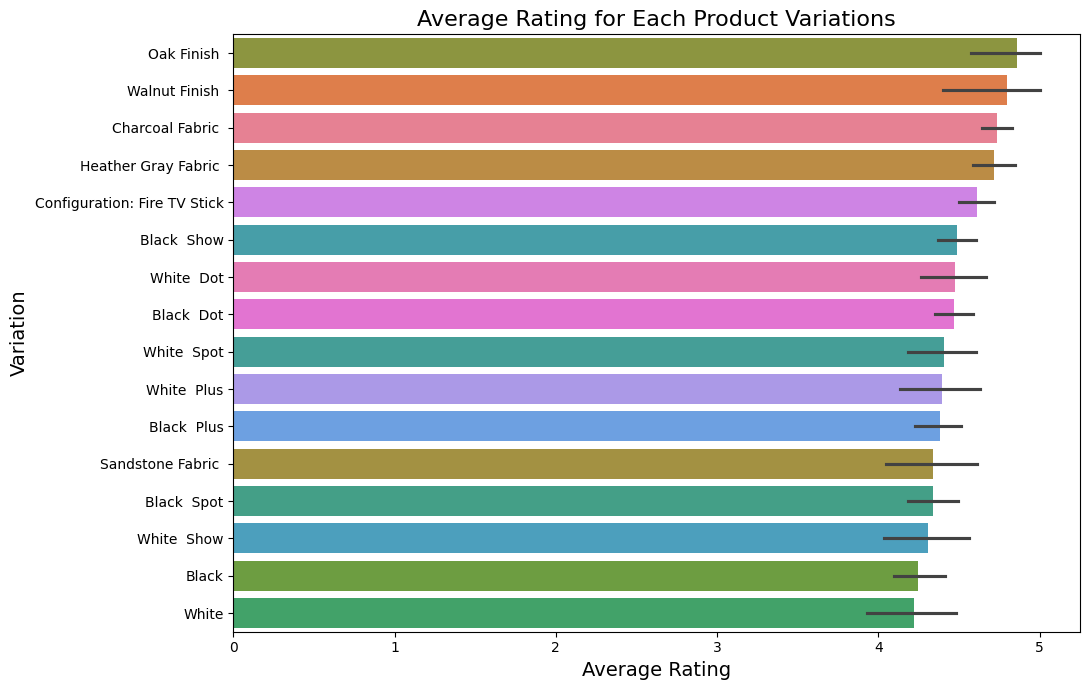

In [26]:
mean_ratings = df.groupby('variation')['rating'].mean().sort_values(ascending=False).index

plt.figure(figsize=(11, 7))
sns.barplot(x='rating', y='variation', data=df, order=mean_ratings, hue='variation')
plt.title('Average Rating for Each Product Variations', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Variation', fontsize=14)
plt.tight_layout()
plt.show()


## Analisa Feedback

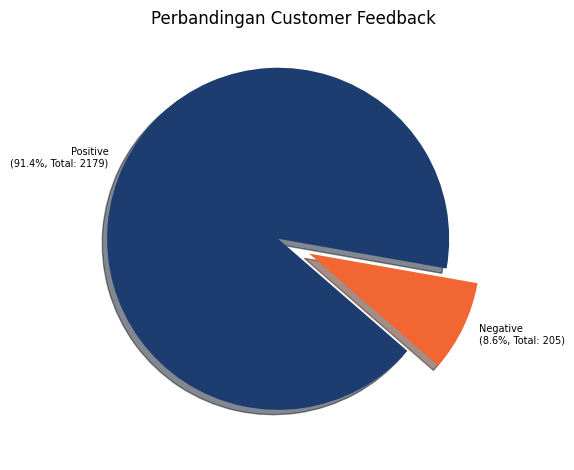

In [27]:
color = [color_codes[0], color_codes[1]]
target= eda_df['feedback_string'].value_counts()
labels = [f'{index}\n({(val / sum(target)) * 100:.1f}%, Total: {val})' for index, val in zip(target.index, target)]
plt.pie(target, labels=labels, startangle=350, colors=color, textprops={'fontsize': 7}, explode= [0.1,0.1], shadow=True)
plt.title('Perbandingan Customer Feedback', fontsize=12)
plt.tight_layout()
plt.show()


Di sini, terlihat dengan jelas bahwa kolom target imbalance. Dimana hanya terdapat 8,6% dari dataset yang memberikan review negatif. Artinya, mayoritas customer merasa puas. Tetapi ini masih analisa secara global, tidak berdasarkan variasinya. Saya akan menggali lebih dalam pada tahapan selanjutnya. 

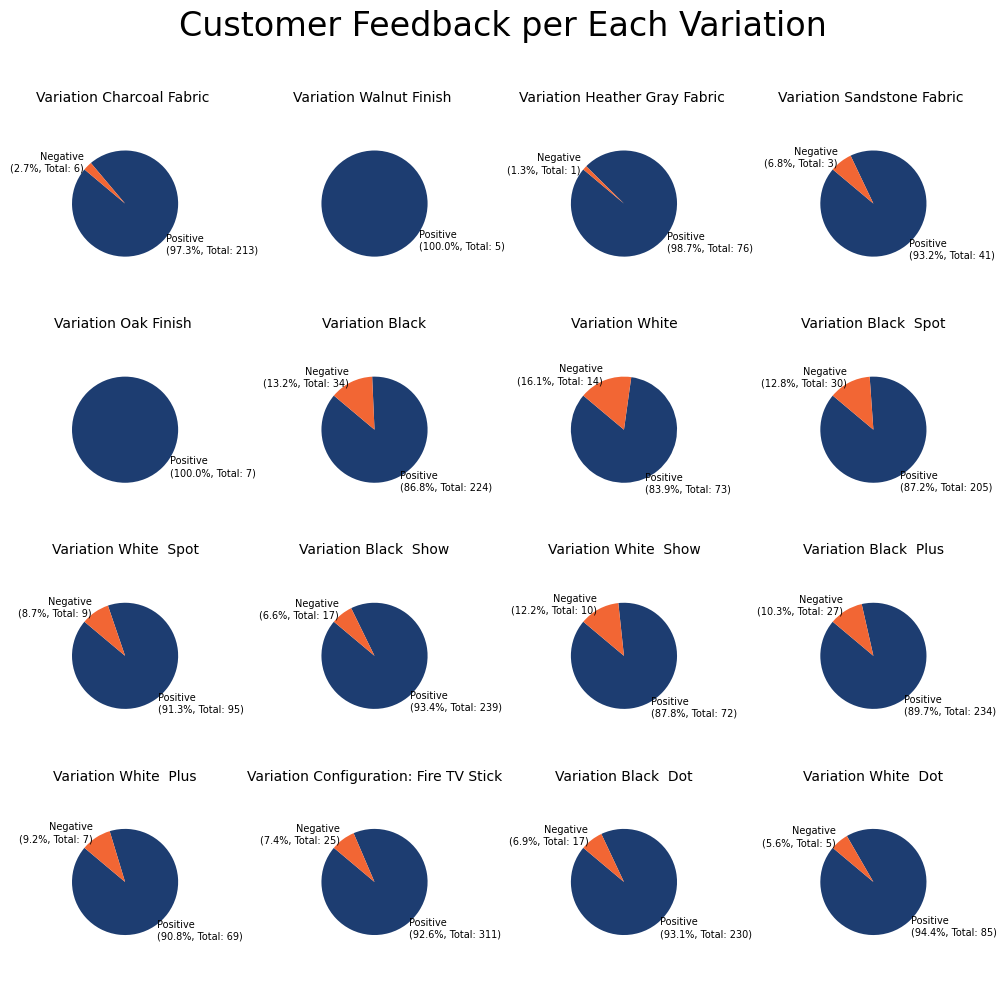

In [28]:
variations = eda_df['variation'].unique()
color = [color_codes[0], color_codes[1]]
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Customer Feedback per Each Variation\n', fontsize=24, ha='center')

for i, variation in enumerate(variations):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    data_filtered = eda_df[eda_df['variation'] == variation]
    class_counts = data_filtered['feedback_string'].value_counts()
    labels = [f'{index}\n({(val / sum(class_counts)) * 100:.1f}%, Total: {val})' for index, val in zip(class_counts.index, class_counts)]
    sizes = class_counts.values
    ax.pie(sizes, labels=labels, startangle=140, colors=color, textprops={'fontsize': 7})
    ax.set_title(f'Variation {variation}', fontsize=10)
    ax.axis('equal')

plt.tight_layout()
plt.show()


Variation white memiliki persentase negative sentimen tertinggi.  
Rating for Black Show: Hampir semua penilaian adalah 5 menunjukkan tingkat kepuasan yang sangat tinggi juga.  
Terlihat ada 2 kolom yang tidak memiliki kelas sentimen negatif sama sekali, yaitu Oak Finish dan Walnut Finish.  
Berikut adalah pembuktiannya, dimana kelas sentimen Negative hanya terdapat pada 14 kolom saja, sementara kelas terdiri dari 16 kelas. 

In [29]:
eda_df.groupby('feedback_string')['variation'].nunique()

feedback_string
Negative    14
Positive    16
Name: variation, dtype: int64

## Analisa Reviews

### Analisa Karakter Teks

Selanjutnya saya akan melakukan analisa terhadap karakter kolom review. Pertama saya akan cek jumlah minimum maximum dan rata-rata karakter di kolom revews

In [30]:
eda_df['reviews_char'] = eda_df['verified_reviews'].apply(len)
min_char_df1 = eda_df['reviews_char'].min()
max_char_df1 = eda_df['reviews_char'].max()
shortest_review_df1 = eda_df[eda_df['reviews_char'] == min_char_df1]
longest_review_df1 = eda_df[eda_df['reviews_char'] == max_char_df1]
mean_char_df1 = eda_df['reviews_char'].mean()

print('Karakter Terpendek:')
print(shortest_review_df1['verified_reviews'].values.tolist())
print(min_char_df1, 'Karakter')
print(shortest_review_df1.index)
print()
print('Karakter Terpanjang:')
print(longest_review_df1['verified_reviews'].values.tolist())
print(max_char_df1, 'Karakter')
print(longest_review_df1.index)
print()
print('Rata-rata Jumlah Karakter:', mean_char_df1, 'Karakter')
print()

Karakter Terpendek:
['😍']
1 Karakter
Index([60], dtype='int64')

Karakter Terpanjang:
["Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my c

### Analisa Kata

In [31]:
def word_count(string):
    words = string.split()
    return len(words)

eda_df['reviews_word'] = eda_df['verified_reviews'].apply(word_count)

min_word_df1 = eda_df['reviews_word'].min()
max_word_df1 = eda_df['reviews_word'].max()
shortest_word_df1 = eda_df[eda_df['reviews_word'] == min_word_df1]
longest_word_df1 = eda_df[eda_df['reviews_word'] == max_word_df1]
mean_word_df1 = eda_df['reviews_word'].mean()

print('Kata Terpendek:')
print(min_word_df1, 'Kata')
print()
print('Kata Terpanjang:')
print(max_word_df1, 'Kata')
print()
print('Rata-rata Jumlah Kata:', mean_word_df1, 'Kata')
print()


Kata Terpendek:
1 Kata

Kata Terpanjang:
526 Kata

Rata-rata Jumlah Kata: 26.941275167785236 Kata



Dari informasi ini, kita dapat mengasumsikan bahwa dataset berisi teks dengan variasi panjang yang signifikan, dari satu karakter hingga lebih dari dua ribu karakter. Dari 1 kata hingga 526 kata.

## WordCloud 1

Saya akan melakukan analisa dengan wordcloud

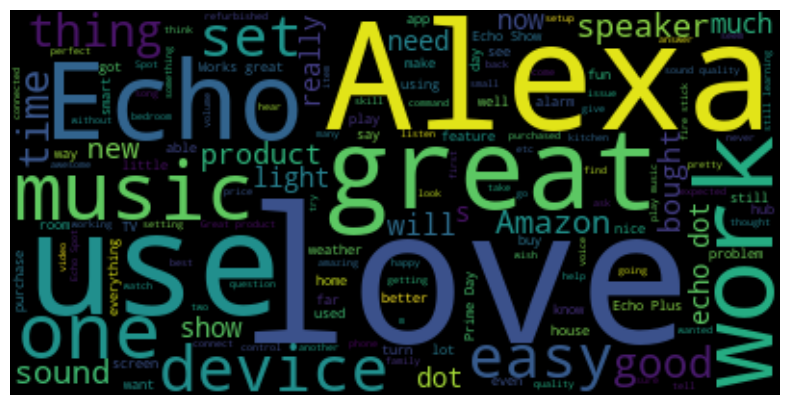

In [32]:
reviews_word = ' '.join(eda_df['verified_reviews'].dropna())
cloud_reviews = WordCloud().generate(reviews_word)

contour_color = color_codes[0]
palette = color_codes  


plt.figure(figsize=(10, 5))
plt.imshow(cloud_reviews, interpolation='bilinear')

plt.axis('off')
plt.show()


Terlihat Kata sifat yang sering muncul adalah LOVE,GREAT, GOOD. Selebihnya adalah kata kerja, nama produk dan variation yang tidak bisa ditafsirkan apakah sentimen negatif atau positif.

# Pre-Processing

Di sini saya menggunakan stopwords, tokenisasi, penghapusan karakter yang tidak penting dsb.

In [33]:
stpwds = set(stopwords.words('english'))

def text_preprocessing(text):
    emot_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF" 
                               "]+", flags=re.UNICODE)
    text = emot_pattern.sub(r'', text) 
    text = text.lower()
    text = re.sub("@[A-Za-z0-9_]+", " ", text)
    text = re.sub("#[A-Za-z0-9_]+", " ", text)
    text = re.sub(r"\\n", " ",text)
    text = text.strip()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"www.\S+", " ", text)
    text = re.sub("[^A-Za-z\s']", " ", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stpwds]
    text = ' '.join(tokens)
    
    return text

# Preprocessing dan drop instance yang kosong
df['p_verified_reviews'] = df['verified_reviews'].apply(text_preprocessing)
df = df[df['p_verified_reviews'] != '']


Pre-Processing sudah selesai, selanjutnya saya akan Melakukan EDA tahap 2

# Exploratory Data Analysis (Phase 2)

Saya akan save csv untuk deployment

In [34]:
df.to_csv('eda.csv', index=False)

Saya buat variabel eda yang ke2.

In [35]:
eda_df_2= df.copy()

## Analisa Karakter

Saya akan lakukan analisa ulang setelah tahap pre processing

In [36]:
eda_df_2['reviews_char'] = eda_df_2['p_verified_reviews'].apply(len)
min_char_df2 = eda_df_2['reviews_char'].min()
max_char_df2 = eda_df_2['reviews_char'].max()
shortest_review_df2 = eda_df_2[eda_df_2['reviews_char'] == min_char_df2]
longest_review_df2 = eda_df_2[eda_df_2['reviews_char'] == max_char_df2]
mean_char_df2 = eda_df_2['reviews_char'].mean()

print('Karakter Terpendek:')
print(min_char_df2, 'Karakter')
print(shortest_review_df2['p_verified_reviews'].values.tolist())
print(shortest_review_df2.index)
print()
print('Karakter Terpanjang:')
print(max_char_df2, 'Karakter')
print(longest_review_df2['p_verified_reviews'].values.tolist())
print(longest_review_df2.index)
print()
print('Rata-rata Jumlah Karakter:', mean_char_df2, 'Karakter')
print()

Karakter Terpendek:
2 Karakter
['ok']
Index([1786], dtype='int64')

Karakter Terpanjang:
1694 Karakter
["incredible piece technology right center living room island kitchen counter mic speaker goes every direction quality sound quite good connected echo via bluetooth sony soundbar tv find echo placement sound appealing 's audiophile equipment good range decent bass sound adequate indoor entertaining loud enough bother neighbors building knob top works great adjusting volume first echo device would imagine press volume buttons echo large inconvenience precise alone would recommend regular echo nd generation piece looks quality quite sturdy weight rubber material bottom good grip granite counter cat even rub scent without tipping order came free philips hue bulb installed along extra one bought put bulbs living room floor lamp turned light say alexa connect devices default names bulb assigned first light second light dimmer floor lamp turned one lights saying alexa turn second light alex

## Analisa Kata

In [37]:
eda_df_2['reviews_word'] = eda_df_2['p_verified_reviews'].apply(word_count)
min_word_df2 = eda_df_2['reviews_word'].min()
max_word_df2 = eda_df_2['reviews_word'].max()
shortest_word_df2 = eda_df_2[eda_df_2['reviews_word'] == min_word_df2]
longest_word_df2 = eda_df_2[eda_df_2['reviews_word'] == max_word_df2]
mean_word_df2 = eda_df_2['reviews_word'].mean()

print('Kata Terpendek:')
print(min_word_df2, 'Kata')
print(shortest_word_df2['p_verified_reviews'].values.tolist())
print(shortest_word_df2.index)
print()
print('Kata Terpanjang:')
print(max_word_df2, 'Kata')
print(longest_word_df2['p_verified_reviews'].values.tolist())
print(longest_word_df2.index)
print()
print('Rata-rata Jumlah Kata:', mean_word_df2, 'Kata')
print()

Kata Terpendek:
1 Kata
['loved', 'music', 'expected', 'like', 'great', 'setting', 'awesome', 'like', 'love', 'love', 'love', 'cool', 'love', 'entertainment', 'everything', 'love', 'enjoy', 'cool', 'liked', 'like', 'terrific', 'love', 'love', 'best', 'great', 'love', 'love', 'loud', 'working', 'works', 'love', 'love', 'divertido', 'thanks', 'thanks', 'love', 'great', 'love', 'works', 'course', 'new', 'thumbs', 'workreat', 'problems', 'god', 'good', 'useful', 'amazing', 'works', 'love', 'love', 'love', 'love', 'amazing', 'perfect', 'perfect', 'love', 'useful', 'love', 'perfect', 'nice', 'like', 'love', 'love', 'love', 'love', 'nice', 'great', 'meh', 'problem', 'love', 'amazed', 'love', 'love', 'excellent', 'great', 'love', 'love', 'perfect', 'good', 'love', 'cool', 'like', 'fun', 'love', 'needs', 'amazing', 'fun', 'love', 'greatest', 'love', 'love', 'love', 'great', 'ight', 'love', 'love', 'youtube', 'like', 'love', 'love', 'home', 'love', 'love', 'great', 'fun', 'love', 'fantastic', 'lo

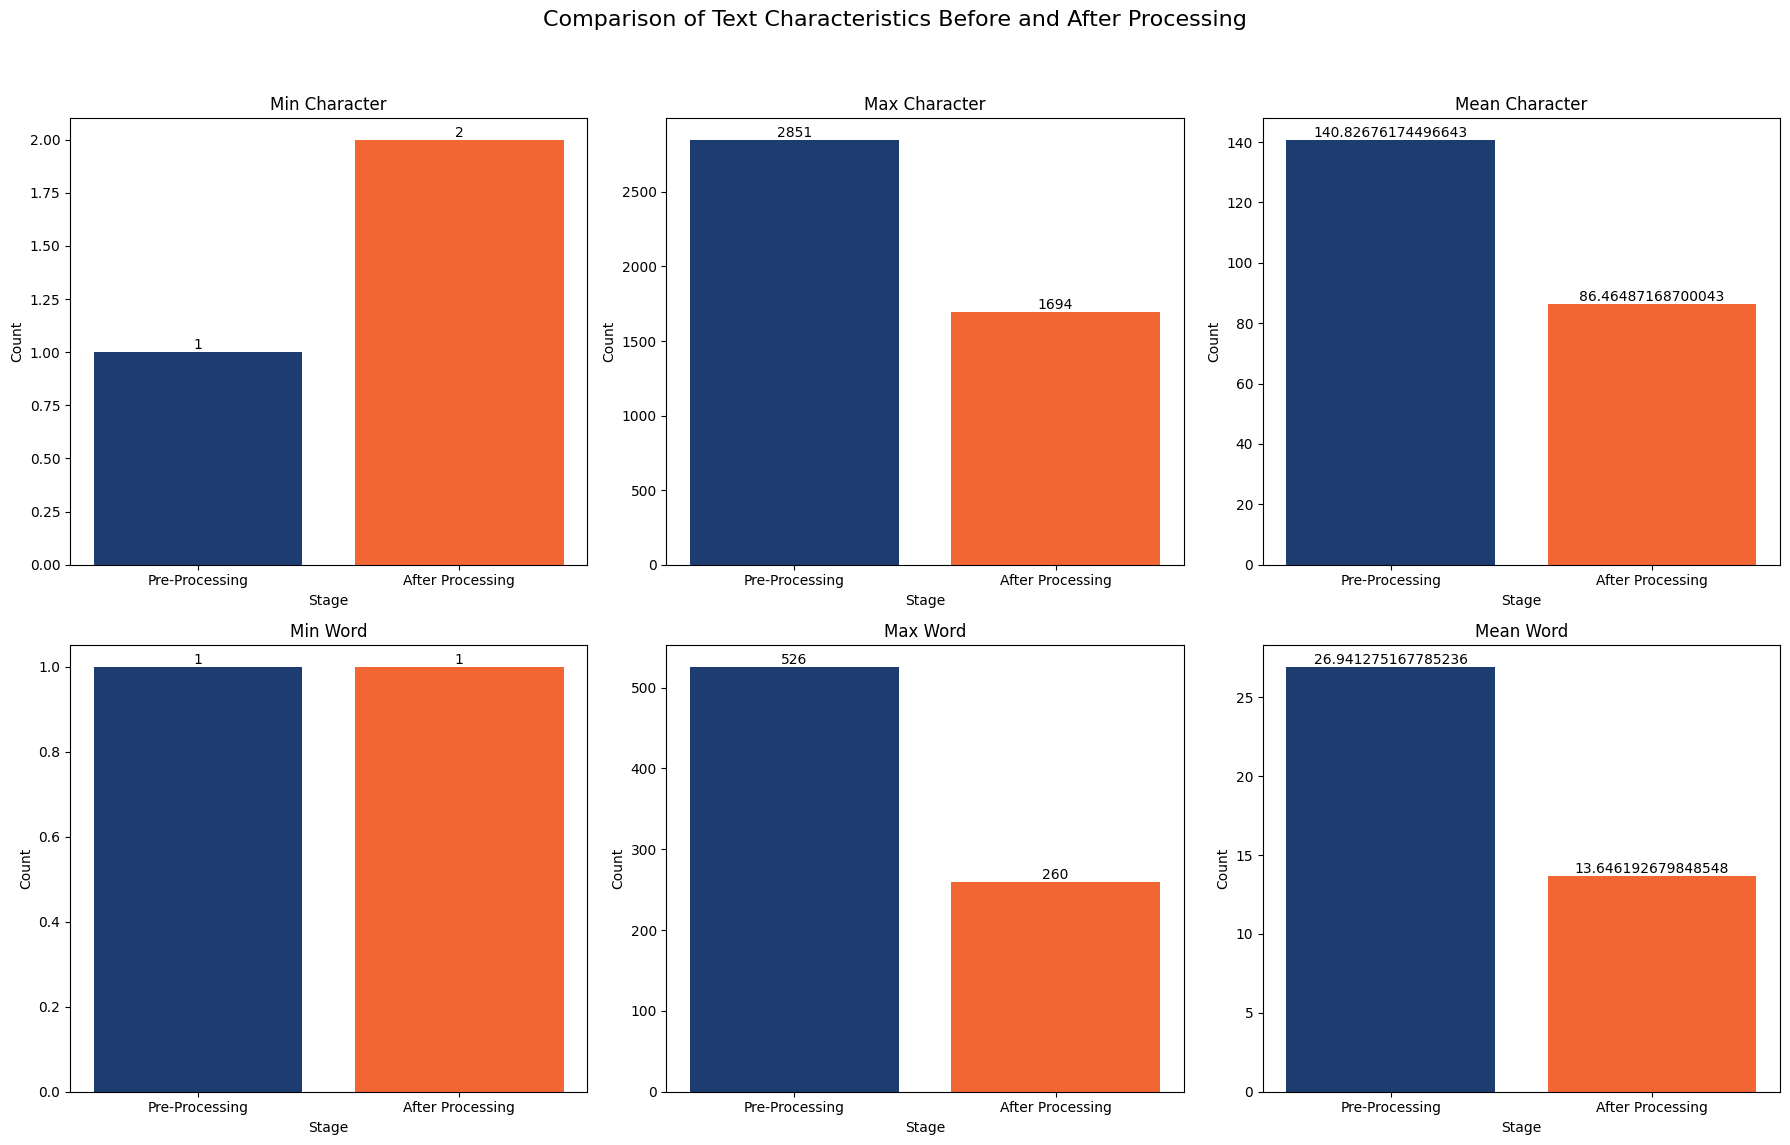

In [38]:

data = [
    [min_char_df1, min_char_df2],
    [max_char_df1, max_char_df2],
    [mean_char_df1, mean_char_df2]
]

titles = ['Min Character', 'Max Character', 'Mean Character']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

for i in range(3):
    bars = axes[0, i].bar(['Pre-Processing', 'After Processing'], data[i], color=color_codes)
    axes[0, i].set_title(titles[i])
    for bar in bars:
        height = bar.get_height()
        axes[0, i].text(bar.get_x() + bar.get_width() / 2., height, f'{height}', ha='center', va='bottom')

data_word = [
    [min_word_df1, min_word_df2],
    [max_word_df1, max_word_df2],
    [mean_word_df1, mean_word_df2]
]

titles_word = ['Min Word', 'Max Word', 'Mean Word']
for i in range(3):
    bars_word = axes[1, i].bar(['Pre-Processing', 'After Processing'], data_word[i], color=color_codes)
    axes[1, i].set_title(titles_word[i])
    for bar in bars_word:
        height = bar.get_height()
        axes[1, i].text(bar.get_x() + bar.get_width() / 2., height, f'{height}', ha='center', va='bottom')

fig.suptitle('Comparison of Text Characteristics Before and After Processing', fontsize=16)
for ax in axes.flat:
    ax.set_ylabel('Count')
    ax.set_xlabel('Stage')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Chart di atas menunjukkan bahwa proses pengolahan data telah berhasil mengurangi panjang teks secara signifikan, baik dalam hal karakter maupun kata. Ini karena sudah ditempuh langkah-langkah seperti menghapus kata-kata yang tidak perlu, menghilangkan spasi berlebih, atau mungkin menghilangkan bagian teks yang dianggap tidak relevan, menghapus emoji dsb. Seharusnya, proses ini bisa membuat algoritma bekerja lebih baik.

## Word Cloud

Word Cloud tahap 2 setelah pre-processing. Saya menggunakan variabel eda_df_2

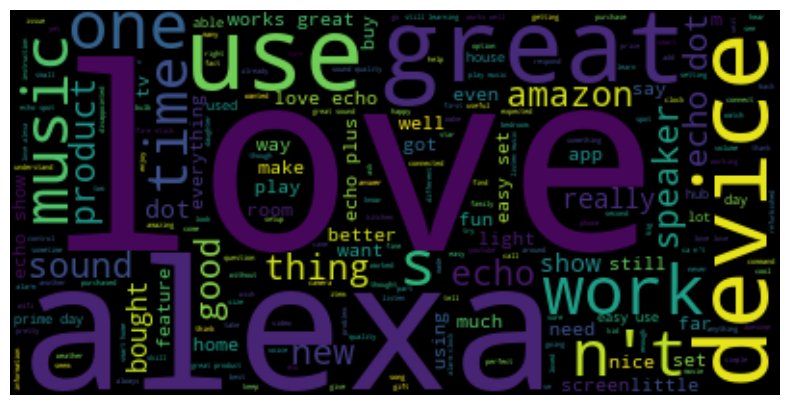

In [39]:
reviews_word = ' '.join(eda_df_2['p_verified_reviews'].dropna())
cloud_reviews = WordCloud().generate(reviews_word)
contour_color = color_codes[0] 
palette = color_codes 

plt.figure(figsize=(10, 5))
plt.imshow(cloud_reviews, interpolation='bilinear')
plt.axis('off')
plt.show()

Tidak jauh perbedaannya. Artinya pre-processing tidak mempengaruhi esensi dari data asli

# Feature Engineering

Pertama saya akan split data menggunakan train test split

In [42]:


X_train_val, X_test, y_train_val, y_test = train_test_split(df['p_verified_reviews'],
                                                    df['feedback'],
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df['feedback'])

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1818,)
Val Size   :  (202,)
Test Size  :  (357,)


# Model Definition

Sebelum mendifinisikan model, saya akan melakukan countvectorizer

In [375]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<1818x3326 sparse matrix of type '<class 'numpy.int64'>'
	with 22105 stored elements in Compressed Sparse Row format>

In [376]:
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  3326
Maximum Sentence Length :  217 tokens


In [377]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [378]:
# Example Result
np.random.seed(93)
baris= np.random.randint(0,2385)

## Document example
print('Document example')
print(df.p_verified_reviews[baris])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df.p_verified_reviews[baris]]))
print('Vector size : ', text_vectorization([df.p_verified_reviews[baris]]).shape)

Document example
second show like much use mine music arlo security cameras connect display outdoor cameras voice exceptionally capable devices highly recommend

Result of Text Vectorization
tf.Tensor(
[[ 206   28    6   34    8  775    7  821  388  357  108  438 1438  357
    67 2836  974   48  222  112    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0

In [379]:
text_vectorization.get_vocabulary()[0:20]

['',
 '[UNK]',
 'love',
 'echo',
 'great',
 'alexa',
 'like',
 'music',
 'use',
 'works',
 'one',
 'nt',
 'easy',
 'sound',
 's',
 'set',
 'amazon',
 'dot',
 'good',
 'product']

In [380]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [381]:
# Example Result

## Document example
print('Document example')
print(df.p_verified_reviews[baris])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.p_verified_reviews[baris]]))
print('Vector size : ', text_vectorization([df.p_verified_reviews[baris]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.p_verified_reviews[baris]])))
print('Vector size : ', embedding(text_vectorization([df.p_verified_reviews[baris]])).shape)

Document example
second show like much use mine music arlo security cameras connect display outdoor cameras voice exceptionally capable devices highly recommend

Result of  Text Vectorization
tf.Tensor(
[[ 206   28    6   34    8  775    7  821  388  357  108  438 1438  357
    67 2836  974   48  222  112    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     

In [382]:
# Model Training using LSTM
# %%time


## Clear Session
tf.keras.backend.clear_session()

seed= 93
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(text_vectorization)  # Pastikan sudah diinisialisasi sebelumnya
model.add(embedding)           # Pastikan sudah diinisialisasi sebelumnya
model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Perubahan di sini untuk klasifikasi biner

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Asumsi X_train, y_train, X_val, y_val sudah ada dan dalam format yang tepat
model_hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
57/57 [==============================] - 20s 176ms/step - loss: 0.3493 - accuracy: 0.9059 - val_loss: 0.2713 - val_accuracy: 0.9158
Epoch 2/20
57/57 [==============================] - 10s 175ms/step - loss: 0.2482 - accuracy: 0.9136 - val_loss: 0.2027 - val_accuracy: 0.9158
Epoch 3/20
57/57 [==============================] - 8s 138ms/step - loss: 0.1485 - accuracy: 0.9378 - val_loss: 0.2416 - val_accuracy: 0.9109
Epoch 4/20
57/57 [==============================] - 8s 133ms/step - loss: 0.0584 - accuracy: 0.9813 - val_loss: 0.2270 - val_accuracy: 0.9208
Epoch 5/20
57/57 [==============================] - 8s 143ms/step - loss: 0.0261 - accuracy: 0.9934 - val_loss: 0.2599 - val_accuracy: 0.9208
Epoch 6/20
57/57 [==============================] - 8s 136ms/step - loss: 0.0090 - accuracy: 0.9989 - val_loss: 0.2251 - val_accuracy: 0.9208
Epoch 7/20
57/57 [==============================] - 8s 137ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.2523 - val_accuracy: 0.9257
Epoc

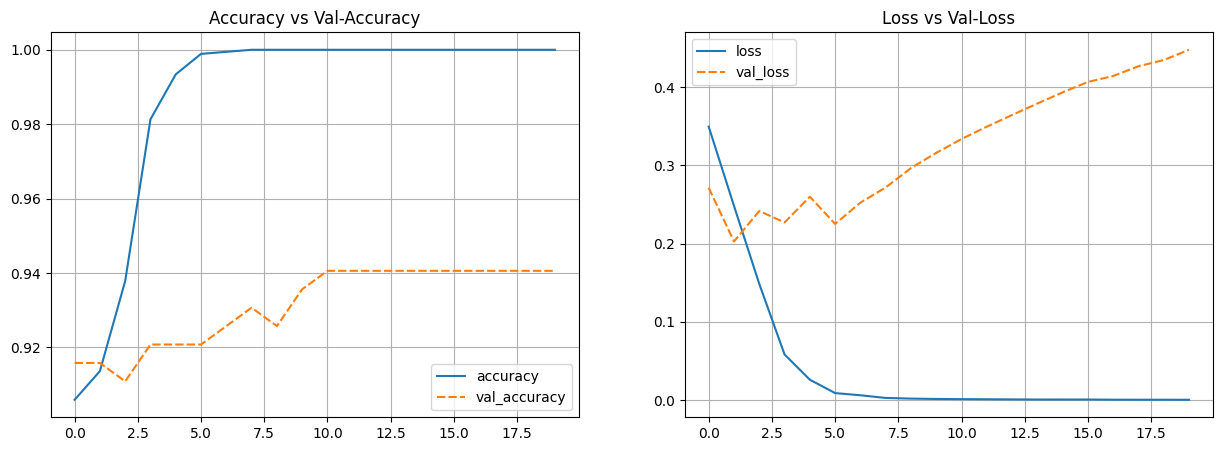

In [383]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari grafik di atas tingkat akurasi training meningkat tajam pada awalnya dan kemudian stabil di sekitar nilai mendekati 1.0. Ini menunjukkan performa yang sangat baik pada data training.  

Akurasi validation setelah sideways juga stabil tetapi pada nilai yang lebih rendah dibandingkan training. Ini bisa dibilang model overfitting.

In [384]:
model.predict(X_test)

12/12 [==============================] - 4s 65ms/step


array([[3.8007239e-04],
       [9.9975753e-01],
       [9.9975711e-01],
       [7.2380382e-04],
       [9.9976009e-01],
       [9.9975640e-01],
       [9.9938917e-01],
       [9.9975467e-01],
       [9.9975616e-01],
       [9.9976408e-01],
       [6.8556878e-04],
       [9.9976307e-01],
       [9.9971825e-01],
       [9.9976271e-01],
       [9.9975353e-01],
       [9.9975199e-01],
       [9.9976194e-01],
       [9.9975717e-01],
       [9.9975771e-01],
       [9.9975991e-01],
       [9.9976194e-01],
       [9.9975300e-01],
       [3.7667598e-04],
       [9.9976194e-01],
       [9.9974871e-01],
       [9.9972218e-01],
       [9.9975806e-01],
       [9.9975640e-01],
       [9.9974650e-01],
       [3.5659838e-04],
       [9.9976283e-01],
       [9.9975413e-01],
       [9.9973965e-01],
       [9.9975473e-01],
       [9.9976259e-01],
       [9.9976259e-01],
       [7.2380382e-04],
       [9.9975371e-01],
       [9.9975616e-01],
       [2.9815026e-04],
       [9.9975312e-01],
       [9.997558

# Model Prediction

In [385]:
y_pred_seq = model(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42        31
           1       0.94      0.94      0.94       326

    accuracy                           0.90       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.90      0.90      0.90       357



Model saya ini jelas tidak seimbang dari awal, antara 0 dan 1. Antara sentimen negatif dan positif.  
Kelas 1 memiliki nilai precision, recall, dan f1-score yang sangat tinggi (0.94)  
Kelas 0 memiliki nilai yang jauh lebih rendah (0.42) untuk ketiga metrik tersebut.  
Ini menandakan bahwa model ini jauh lebih akurat dalam memprediksi kelas 1 dibandingkan dengan kelas 0.  

# Save Model

In [387]:
with open('pre_processing.pkl', 'wb') as p:
  pickle.dump(df, p)

In [388]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 217)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 217, 128)          425728    
                                                                 
 bidirectional (Bidirection  (None, 217, 64)           41216     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 217, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                        

In [389]:
model.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 217)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 217, 128)          425728    
                                                                 
 bidirectional (Bidirection  (None, 217, 64)           41216     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 217, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                        

In [390]:
qa = df.iloc[0].to_dict()
qa

{'rating': 5,
 'date': Timestamp('2018-07-31 00:00:00'),
 'variation': 'Charcoal Fabric ',
 'verified_reviews': 'Love my Echo!',
 'feedback': 1,
 'p_verified_reviews': 'love echo'}

In [421]:
model.save("word_model.keras", save_format="keras")

# Pengambilan Kesimpulan

KESEIMPULAN
- Data sangat-sangat raw, tetapi memang demikian seharusnya dataset sentimen karena tidak ada standard baku customer untuk melakukan review. Mereka dibebaskna menulis secara independent.  
- Proses pembersihan begitu cukup pnajang.  
- Overfit dan score class 0 sangat rendah. Hal ini bisa terjadi karena imbalancenya data tersebut.  

SARAN  
- Perlu melakukan penyesuaian pembagian data, pre-process agar lebih representatif lagi dll.  
- Secara garis besar customer mengekspresikan kepuasan mereka.  